In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

## 1) 載入資料集

In [2]:
wine = load_wine()
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","age"])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 2) 切割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['age'],axis=1).values # 移除age並取得剩下欄位資料
y = df_data['age'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (124, 13)
test shape: (54, 13)


## 建立 Logistic regression 模型
邏輯迴歸是由線性回歸變化而來的，屬判別模型適合解決二元分類問題。

Parameters:
- penalty: 正規化l1/l2，防止模型過度擬合。
- C: 數值越大對 weight 的控制力越弱，預設為1。
- n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
- solver: 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
- multi_class: 選擇分類方式，ovr就是one-vs-rest(OvR)，而multinomial就是many-vs-many(MvM)。預設為 auto，故模型訓練中會取一個最好的結果。
- max_iter: 迭代次數，預設為100代。
- class_weight: 若遇資料不平衡問題可以設定balance，預設=None。
- random_state: 亂數種子僅在solver=sag/liblinear時有用。

Attributes:
- coef_: 取得斜率。
- intercept_: 取得截距。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- predict_proba: 預測每個類別的機率值。
- score: 預測成功的比例。

In [4]:
from sklearn.linear_model import LogisticRegression

# 建立Logistic模型
logisticModel = LogisticRegression(multi_class='auto', solver='newton-cg',random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = logisticModel.predict(X_train)

## 使用Score評估模型

In [5]:
# 預測成功的比例
print('訓練集: ',logisticModel.score(X_train,y_train))
print('測試集: ',logisticModel.score(X_test,y_test))

訓練集:  0.9919354838709677
測試集:  0.9629629629629629


## 真實分類

In [8]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"])
df_test['age'] = y_test
pred = logisticModel.predict(X_test)
df_test['Predict'] = pred

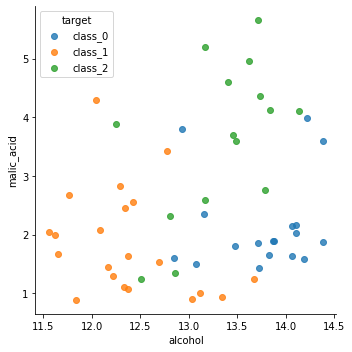

In [11]:
sns.lmplot(x="alcohol", y="malic_acid", hue='age', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

## Logistic regression (訓練集)預測結果

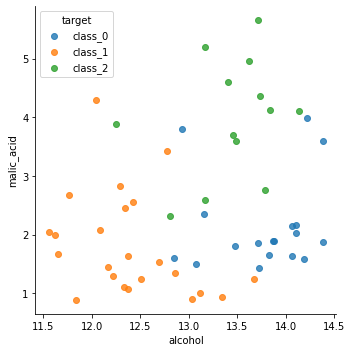

In [12]:
sns.lmplot(x="alcohol", y="malic_acid", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

## Limitation of Logistic Regression
Logistic 其實有很大的限制，如下圖範例在線性不可分的時候無法有效預測。

In [13]:
from sklearn.linear_model import LogisticRegression

X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=[1,0,0,1]

# 建立Logistic模型
logisticModel = LogisticRegression(random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X, y)
# 使用訓練資料預測分類
logisticModel.predict(X)

array([0, 0, 0, 0])

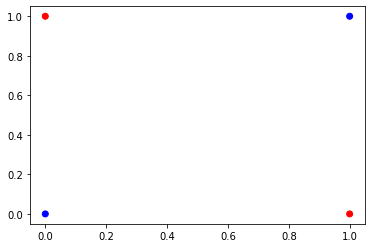

In [14]:
color = "rb"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


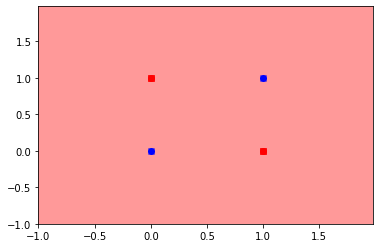

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# 決策邊界函式
def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
	# setup marker generator and color map
	markers = ('s','x','o','^','v')
	colors = ('red','blue','lightgreen','gray','cyan')
	cmap = ListedColormap(colors[:len(np.unique(y))])

	# plot the decision surface
	x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
	x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

	xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
							np.arange(x2_min,x2_max,resolution))

	Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

	Z = Z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
	plt.xlim(xx1.min(),xx1.max())
	plt.ylim(xx2.min(),xx2.max())

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
			alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
	if test_idx:
		X_test, y_test = X[test_idx,:], y[test_idx]
		plt.scatter(X_test[:, 0], X_test[:,1], c='',
			alpha=1.0, linewidth=1, marker='o',
			s=55, label='test set')

# 繪製決策邊界
plt.figure()
plot_decision_regions(X,y,logisticModel)
# Plot also the training points
colors = "rb"
for i, color in zip(logisticModel.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = logisticModel.coef_
intercept = logisticModel.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
              ls="--", color=color)

plot_hyperplane(0, 'r')

plt.show()